# Import Libraries

In [12]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [13]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



## Understanding the Data

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

The **CO2 EMISSIONS (g/km)** column is the dependent column, and the rest are the independent columns.

In [14]:
df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [15]:
print(f'The shape of the data frame : {df.shape}')

The shape of the data frame : (1067, 13)


In [16]:
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [17]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
df = df[
    ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY',
     'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']
]

df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


# Exercise 1 : Histogram

Plot a Histogram for the following columns :-

1. CO2EMISSIONS
2. CYLINDERS
3. ENGINESIZE
4. FUELCONSUMPTION_COMB
5. FUELCONSUMPTION_CITY
6. FUELCONSUMPTION_HWY
7. FUELCONSUMPTION_COMB_MPG

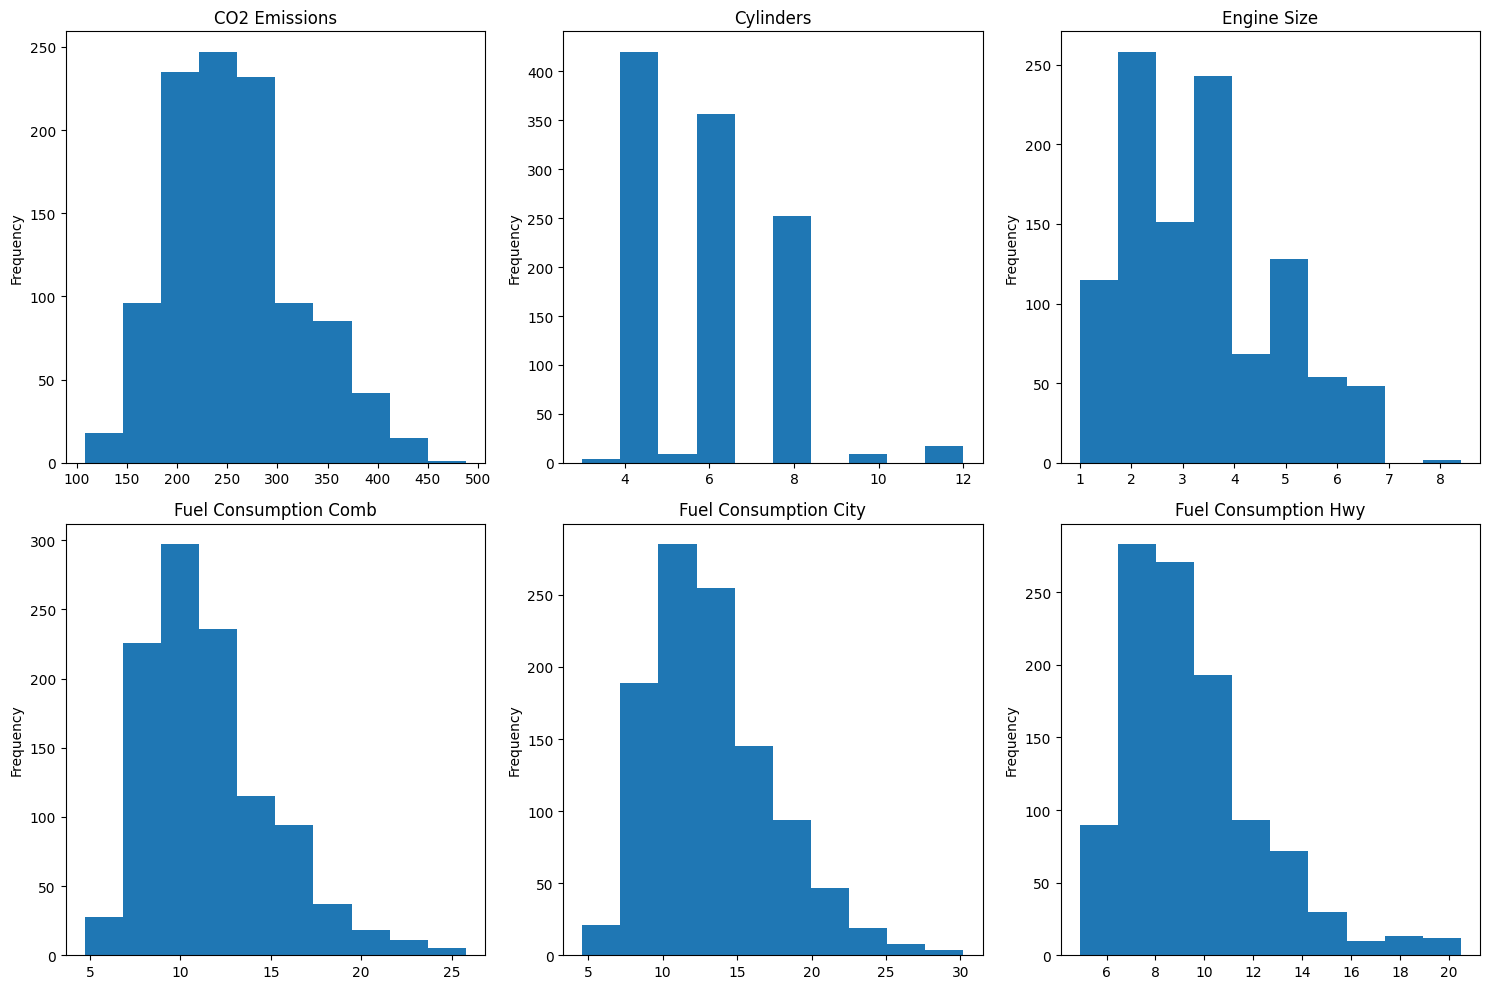

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

df['CO2EMISSIONS'].plot(kind='hist', ax=axes[0, 0], title='CO2 Emissions')
df['CYLINDERS'].plot(kind='hist', ax=axes[0, 1], title='Cylinders')
df['ENGINESIZE'].plot(kind='hist', ax=axes[0, 2], title='Engine Size')
df['FUELCONSUMPTION_COMB'].plot(kind='hist', ax=axes[1, 0], title='Fuel Consumption Comb')
df['FUELCONSUMPTION_CITY'].plot(kind='hist', ax=axes[1, 1], title='Fuel Consumption City')
df['FUELCONSUMPTION_HWY'].plot(kind='hist', ax=axes[1, 2], title='Fuel Consumption Hwy')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'Fuel Consumption Comb MPG'}, ylabel='Frequency'>

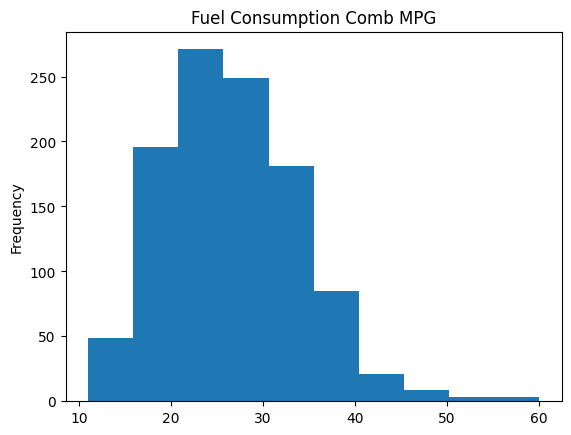

In [21]:
df['FUELCONSUMPTION_COMB_MPG'].plot(kind='hist', title='Fuel Consumption Comb MPG')

# Exercise 2 : Scatter Plots

Plot 7 scatter plots, the 6 X features with CO2EMISSIONS.

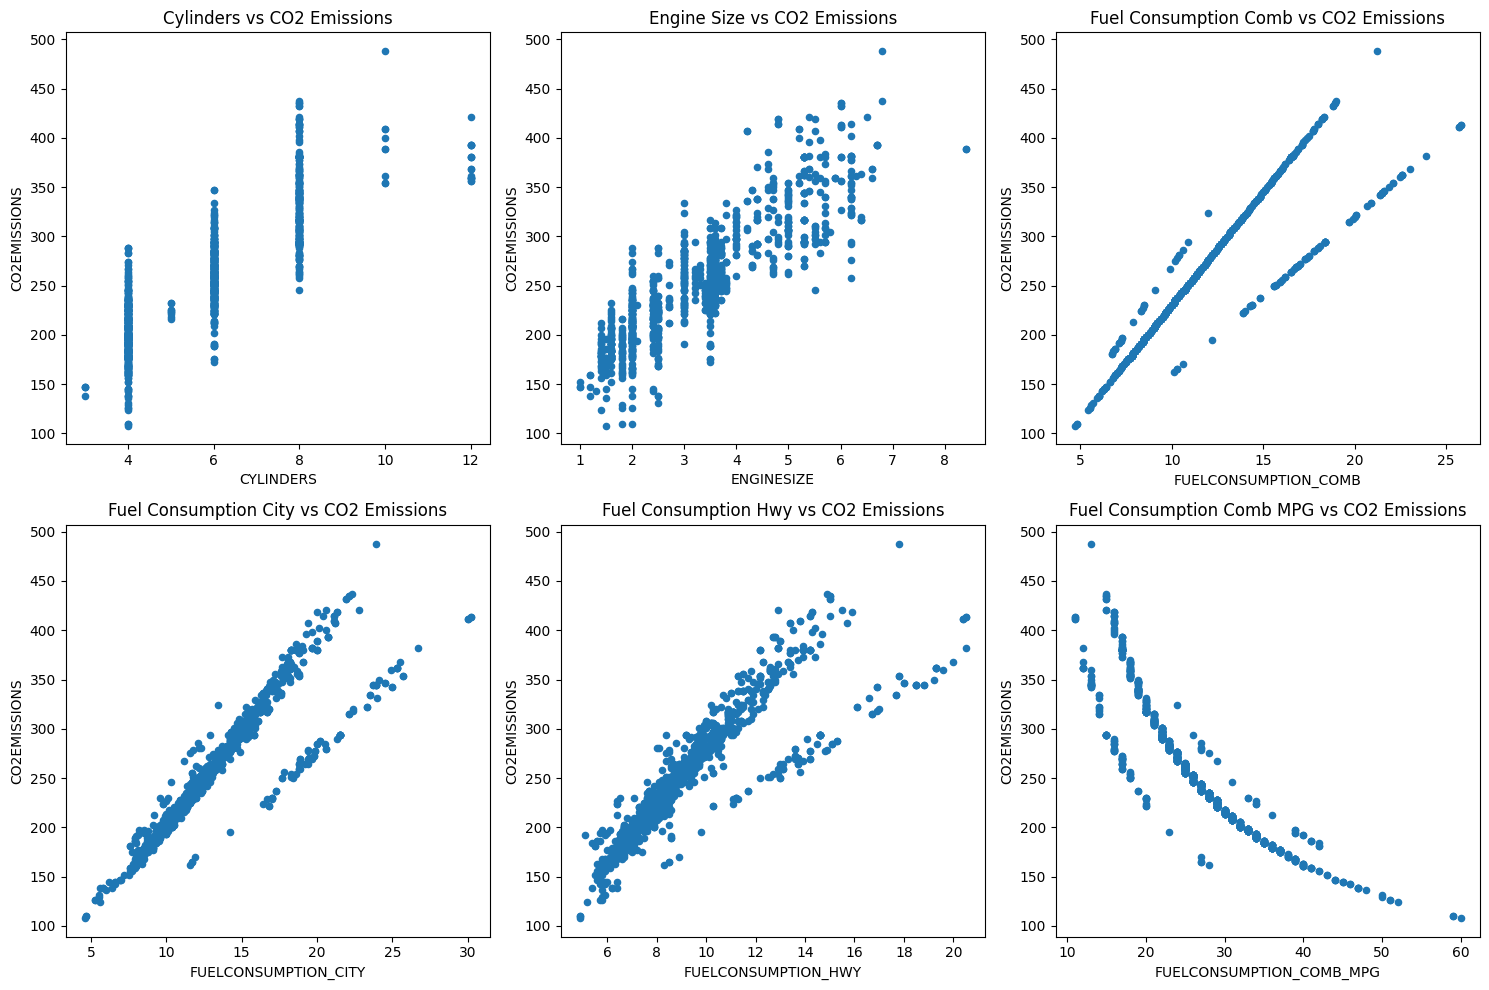

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

df.plot.scatter(x='CYLINDERS', y='CO2EMISSIONS', ax=axes[0, 0], title='Cylinders vs CO2 Emissions')
df.plot.scatter(x='ENGINESIZE', y='CO2EMISSIONS', ax=axes[0, 1], title='Engine Size vs CO2 Emissions')
df.plot.scatter(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', ax=axes[0, 2], title='Fuel Consumption Comb vs CO2 Emissions')
df.plot.scatter(x='FUELCONSUMPTION_CITY', y='CO2EMISSIONS', ax=axes[1, 0], title='Fuel Consumption City vs CO2 Emissions')
df.plot.scatter(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', ax=axes[1, 1], title='Fuel Consumption Hwy vs CO2 Emissions')
df.plot.scatter(x='FUELCONSUMPTION_COMB_MPG', y='CO2EMISSIONS', ax=axes[1, 2], title='Fuel Consumption Comb MPG vs CO2 Emissions')

plt.tight_layout()
plt.show()


# Exercise 3 : Box Plots

Plot 6 box plots for :-
1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY
6. FUELCONSUMPTION_COMB_MPG

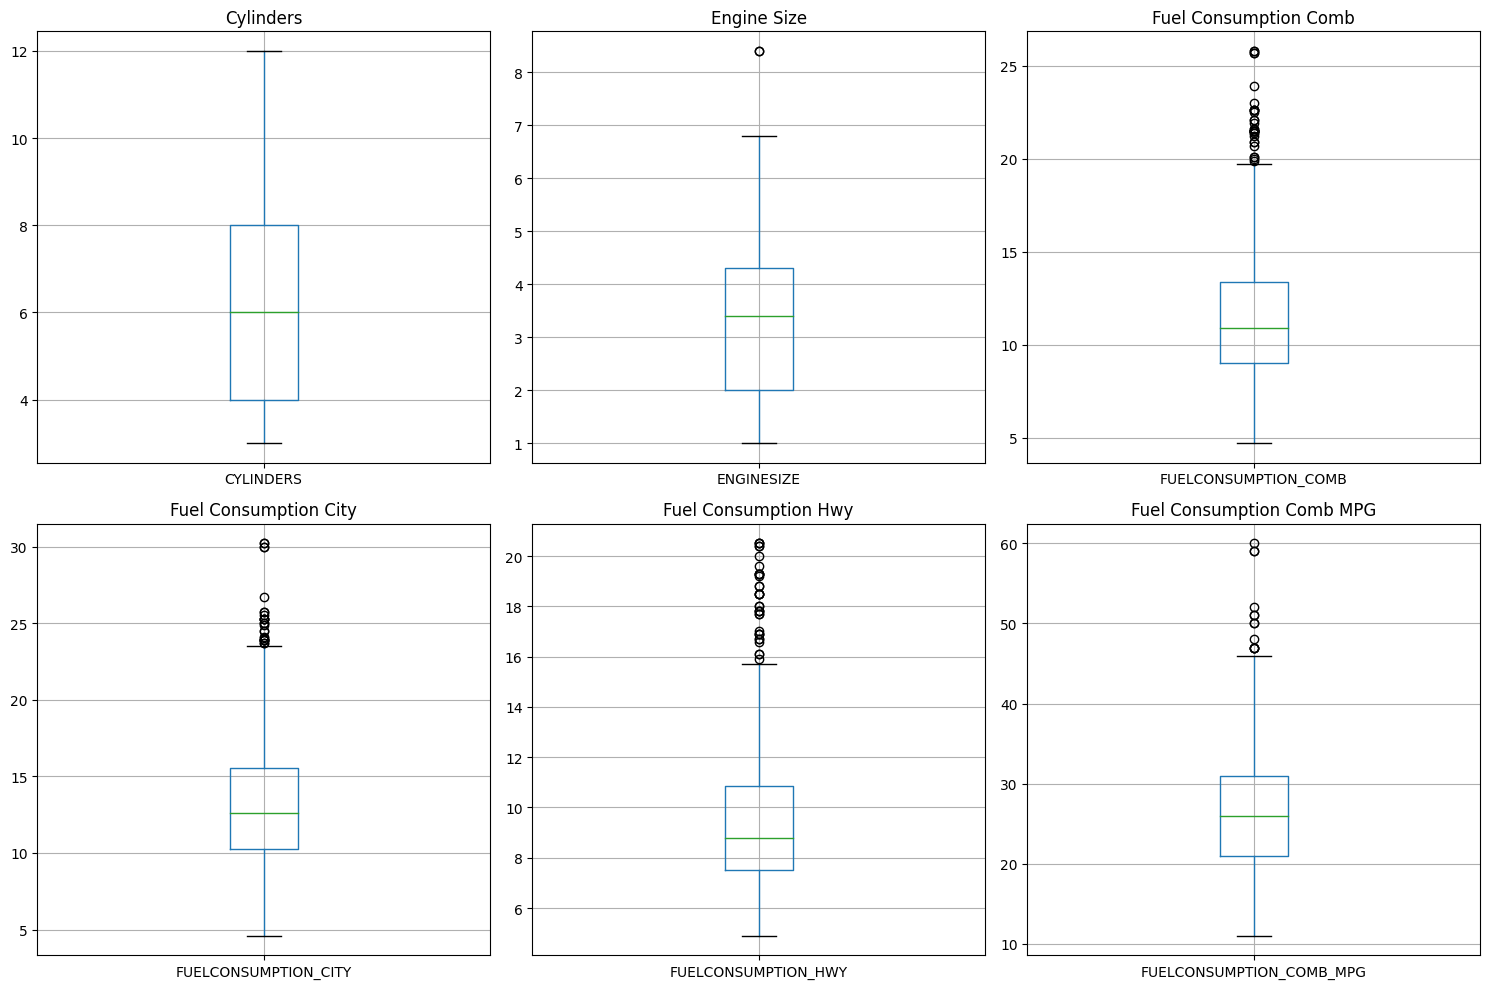

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

df.boxplot(column='CYLINDERS', ax=axes[0, 0])
axes[0, 0].set_title('Cylinders')

df.boxplot(column='ENGINESIZE', ax=axes[0, 1])
axes[0, 1].set_title('Engine Size')

df.boxplot(column='FUELCONSUMPTION_COMB', ax=axes[0, 2])
axes[0, 2].set_title('Fuel Consumption Comb')

df.boxplot(column='FUELCONSUMPTION_CITY', ax=axes[1, 0])
axes[1, 0].set_title('Fuel Consumption City')

df.boxplot(column='FUELCONSUMPTION_HWY', ax=axes[1, 1])
axes[1, 1].set_title('Fuel Consumption Hwy')

df.boxplot(column='FUELCONSUMPTION_COMB_MPG', ax=axes[1, 2])
axes[1, 2].set_title('Fuel Consumption Comb MPG')

plt.tight_layout()
plt.show()



# Exercise 4 : Remove Outliers

Then plot a box plot to check if the outliers was removed or not.

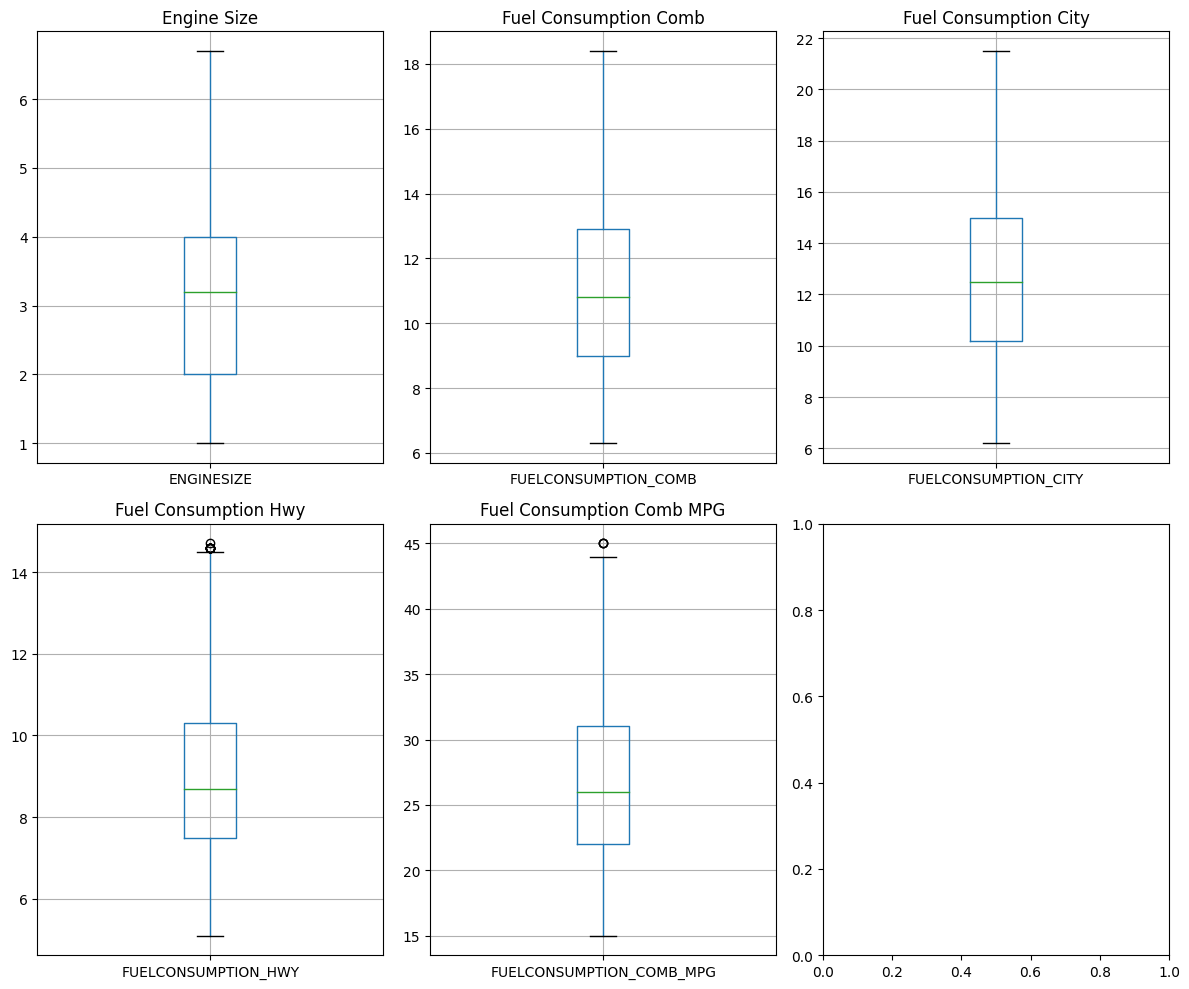

In [24]:
# Frist I write Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_filtered = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_filtered

# Here I select the Columns that need to remove outliers from
columns_to_remove_outliers = ['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']

# For loop to remove outliers
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column)

# Then I Plot box plots to check if outliers were removed
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

df.boxplot(column='ENGINESIZE', ax=axes[0, 0])
axes[0, 0].set_title('Engine Size')

df.boxplot(column='FUELCONSUMPTION_COMB', ax=axes[0, 1])
axes[0, 1].set_title('Fuel Consumption Comb')

df.boxplot(column='FUELCONSUMPTION_CITY', ax=axes[0, 2])
axes[0, 2].set_title('Fuel Consumption City')

df.boxplot(column='FUELCONSUMPTION_HWY', ax=axes[1, 0])
axes[1, 0].set_title('Fuel Consumption Hwy')

df.boxplot(column='FUELCONSUMPTION_COMB_MPG', ax=axes[1, 1])
axes[1, 1].set_title('Fuel Consumption Comb MPG')



plt.tight_layout()
plt.show()


# Exercise 5 : Train and Test Split

Split the features in X variable and target in the Y variable.

Then use train_test_split method to split the dataset into train and test sets.

The test set have 20% of the dataset and the random state is 42.

In [25]:
from sklearn.model_selection import train_test_split

# Here I split the data to Features (X) and Target (Y)
X = df[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB_MPG']]
Y = df['CO2EMISSIONS']

# Then I split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("The X_train shape:", X_train.shape)
print("The Y_train shape:", Y_train.shape)
print('--------------------------------')
print("The X_test shape:", X_test.shape)
print("The Y_test shape:", Y_test.shape)


The X_train shape: (800, 6)
The Y_train shape: (800,)
--------------------------------
The X_test shape: (200, 6)
The Y_test shape: (200,)


# Exercise 4 : Simple Linear Regression.

Train a simple linear regression

X = Engine Size.
Y = Emission.

What is the coefficients and y intercept?

In [26]:
# Here we assign the Engine Size to (X) and Target (Y)
X = X_train[['ENGINESIZE']]

# Then I create a linear regression model
model = LinearRegression()

# Then I Train the model
model.fit(X, Y_train)

# Then I get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Finaly print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [36.23534955]
Intercept: 133.94831955222952


# Exercise 5 : Plot the Output

Plot linear regression model (output).

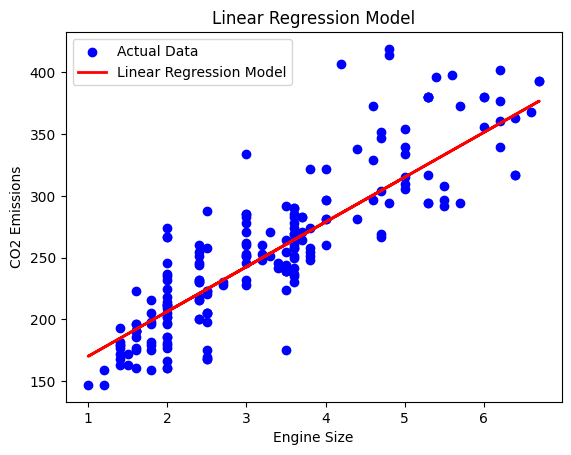

In [27]:
Y_pred = model.predict(X_test[['ENGINESIZE']])

plt.scatter(X_test['ENGINESIZE'], Y_test, color='blue', label='Actual Data')
plt.plot(X_test['ENGINESIZE'], Y_pred, color='red', linewidth=2, label='Linear Regression Model')

plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression Model')


plt.legend()
plt.show()



# Exercise 6 : Evaluation

Evaluate the model using MSE, RMSE, MAE, and R^2.

In [28]:
# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("The Mean Squared Error (MSE):", mse)
print("The Root Mean Squared Error (RMSE):", rmse)
print("The Mean Absolute Error (MAE):", mae)
print("The R-squared (R²):", r2)


The Mean Squared Error (MSE): 987.6380467812265
The Root Mean Squared Error (RMSE): 31.426709130630055
The Mean Absolute Error (MAE): 23.255455351472964
The R-squared (R²): 0.7608594923114448


In [29]:
X_train

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB_MPG
30,6,3.0,11.2,13.1,8.8,25
581,4,2.4,10.2,11.4,8.7,28
750,8,5.5,12.9,15.0,10.3,22
603,4,2.0,8.4,9.8,6.6,34
894,8,4.8,13.0,15.0,10.6,22
...,...,...,...,...,...,...
108,8,4.4,12.7,15.0,9.8,22
285,8,5.7,13.4,16.1,10.0,21
918,6,3.6,16.8,19.4,13.6,17
479,8,5.3,13.8,16.0,11.1,20


# Exercise 7 : Repeat 4, 5, and 6

Repeat the steps 4, 5, and 6.

For the rest features (CYLINDERS, FUELCONSUMPTION_COMB, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY) and then sort the models based on the best performance.

Note : Do not train the FUELCONSUMPTION_COMB_MPG.

Coefficients: [27.63015278]
Intercept: 94.48970454675973
----------------------------------------------------
The Mean Squared Error (MSE): 1180.22823909367
The Root Mean Squared Error (RMSE): 34.354450062454355
The Mean Absolute Error (MAE): 26.829974848934086
The R-squared (R²): 0.7142269060967541
----------------------------------------------------


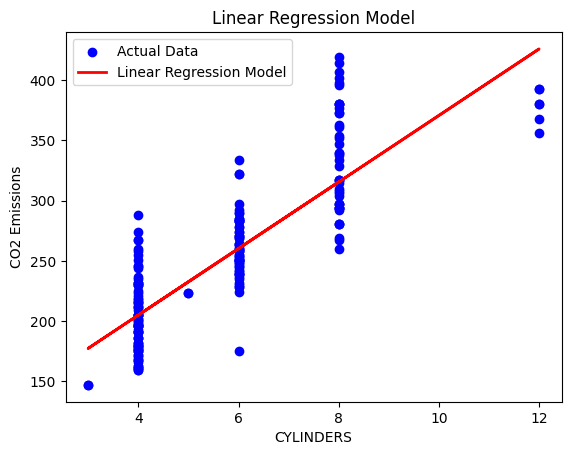

In [30]:
#------------------------------------CYLINDERS----------------------------------------------
# Here we assign the Engine Size to (X) and Target (Y)
X = X_train[['CYLINDERS']]

# Then I create a linear regression model
model = LinearRegression()

# Then I Train the model
model.fit(X, Y_train)

# Then I get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Finaly print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['CYLINDERS']])

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("The Mean Squared Error (MSE):", mse)
print("The Root Mean Squared Error (RMSE):", rmse)
print("The Mean Absolute Error (MAE):", mae)
print("The R-squared (R²):", r2)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['CYLINDERS']])

plt.scatter(X_test['CYLINDERS'], Y_test, color='blue', label='Actual Data')
plt.plot(X_test['CYLINDERS'], Y_pred, color='red', linewidth=2, label='Linear Regression Model')

plt.xlabel('CYLINDERS')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression Model')


plt.legend()
plt.show()





Coefficients: [18.53253994]
Intercept: 44.74186918353897
----------------------------------------------------
The Mean Squared Error (MSE): 477.50463020045277
The Root Mean Squared Error (RMSE): 21.851879328800365
The Mean Absolute Error (MAE): 13.67214850771294
The R-squared (R²): 0.8843800114202499
----------------------------------------------------


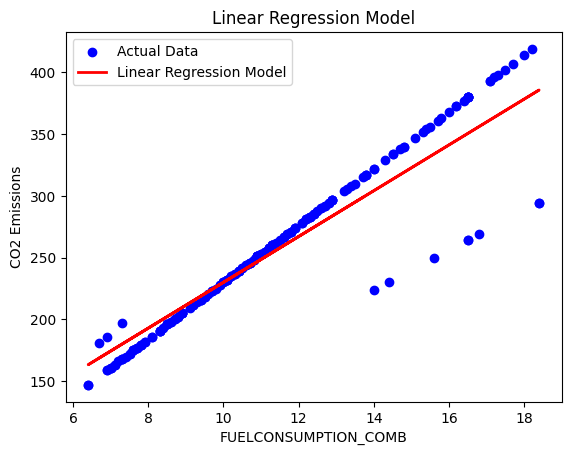

In [31]:
#------------------------------------FUELCONSUMPTION_COMB----------------------------------------------
# Here we assign the FUELCONSUMPTION_COMB  to (X) and Target (Y)
X = X_train[['FUELCONSUMPTION_COMB']]

# Then I create a linear regression model
model = LinearRegression()

# Then I Train the model
model.fit(X, Y_train)

# Then I get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Finaly print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['FUELCONSUMPTION_COMB']])

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("The Mean Squared Error (MSE):", mse)
print("The Root Mean Squared Error (RMSE):", rmse)
print("The Mean Absolute Error (MAE):", mae)
print("The R-squared (R²):", r2)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['FUELCONSUMPTION_COMB']])

plt.scatter(X_test['FUELCONSUMPTION_COMB'], Y_test, color='blue', label='Actual Data')
plt.plot(X_test['FUELCONSUMPTION_COMB'], Y_pred, color='red', linewidth=2, label='Linear Regression Model')

plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression Model')


plt.legend()
plt.show()








Coefficients: [15.40112885]
Intercept: 53.91751269823135
----------------------------------------------------
The Mean Squared Error (MSE): 510.5423929052748
The Root Mean Squared Error (RMSE): 22.595185170856087
The Mean Absolute Error (MAE): 14.209998855815547
The R-squared (R²): 0.8763804539185175
----------------------------------------------------


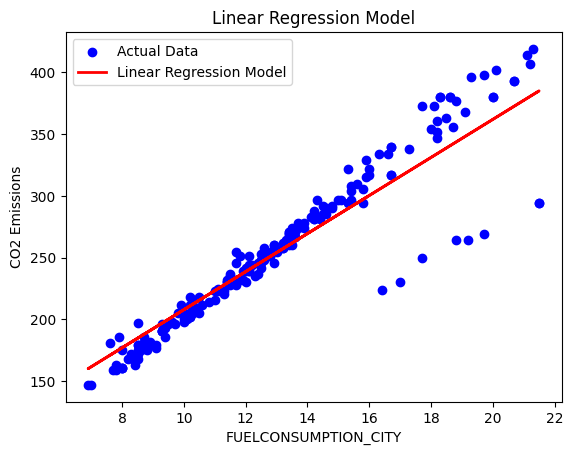

In [32]:
#------------------------------------FUELCONSUMPTION_CITY----------------------------------------------
# Here we assign FUELCONSUMPTION_CITY to (X) and Target (Y)
X = X_train[['FUELCONSUMPTION_CITY']]

# Then I create a linear regression model
model = LinearRegression()

# Then I Train the model
model.fit(X, Y_train)

# Then I get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Finaly print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['FUELCONSUMPTION_CITY']])

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("The Mean Squared Error (MSE):", mse)
print("The Root Mean Squared Error (RMSE):", rmse)
print("The Mean Absolute Error (MAE):", mae)
print("The R-squared (R²):", r2)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['FUELCONSUMPTION_CITY']])

plt.scatter(X_test['FUELCONSUMPTION_CITY'], Y_test, color='blue', label='Actual Data')
plt.plot(X_test['FUELCONSUMPTION_CITY'], Y_pred, color='red', linewidth=2, label='Linear Regression Model')

plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression Model')


plt.legend()
plt.show()









Coefficients: [23.2251742]
Intercept: 40.11342703353685
----------------------------------------------------
The Mean Squared Error (MSE): 607.5931194971232
The Root Mean Squared Error (RMSE): 24.64940403939055
The Mean Absolute Error (MAE): 17.01089384033272
The R-squared (R²): 0.8528811971772887
----------------------------------------------------


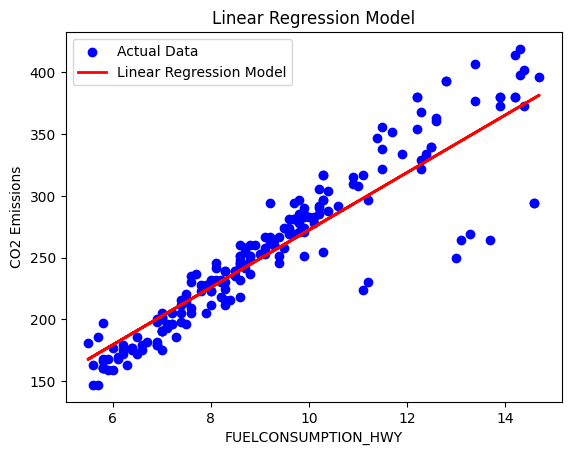

In [33]:
#------------------------------------FUELCONSUMPTION_HWY----------------------------------------------

# Here we assign FUELCONSUMPTION_HWY to (X) and Target (Y)
X = X_train[['FUELCONSUMPTION_HWY']]

# Then I create a linear regression model
model = LinearRegression()

# Then I Train the model
model.fit(X, Y_train)

# Then I get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Finaly print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['FUELCONSUMPTION_HWY']])

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the evaluation metrics
print("The Mean Squared Error (MSE):", mse)
print("The Root Mean Squared Error (RMSE):", rmse)
print("The Mean Absolute Error (MAE):", mae)
print("The R-squared (R²):", r2)
print('----------------------------------------------------')


Y_pred = model.predict(X_test[['FUELCONSUMPTION_HWY']])

plt.scatter(X_test['FUELCONSUMPTION_HWY'], Y_test, color='blue', label='Actual Data')
plt.plot(X_test['FUELCONSUMPTION_HWY'], Y_pred, color='red', linewidth=2, label='Linear Regression Model')

plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2 Emissions')
plt.title('Linear Regression Model')


plt.legend()
plt.show()












##We see that the best is FUELCONSUMPTION_COMB and the worst is CYLINDERS

# Exercise 8 : Multiple Linear Regression

Train one linear regression model with the following features :-

1. CYLINDERS
2. ENGINESIZE
3. FUELCONSUMPTION_COMB
4. FUELCONSUMPTION_CITY
5. FUELCONSUMPTION_HWY

Plot the output for each feature with the Y label.

In [42]:
X = X_train[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]

Y = df['CO2EMISSIONS']

#print("X shape:", X.shape)
#print("Y shape:", Y.shape)


# Ensure that X and Y have the same number of samples
min_samples = min(X.shape[0], Y.shape[0])
X = X[:min_samples]
Y = Y[:min_samples]

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multiple linear regression model
model = LinearRegression()

# Train the model
model.fit(X, Y)

# Get the predicted values
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Coefficients: [ -7.87792976   6.68118788 -43.60341265  25.66542668  16.79274382]
Intercept: 288.0256465384996

Evaluation Metrics:
Mean Squared Error (MSE): 3353.9962302275803
Root Mean Squared Error (RMSE): 57.91369639582316
Mean Absolute Error (MAE): 47.2899050902603
R-squared (R²): 0.03198158262972717
